In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

SELECT max(date) 
FROM measurements

SELECT date 
FROM measurements 
ORDER BY date DESC 
limit 1


SELECT date, prcp 
FROM measurment 
WHERE date > first_date


In [28]:
# Find the most recent date in the data set.
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
most_recent_date_str

'2017-08-23'

Text(0, 0.5, 'Precipitation')

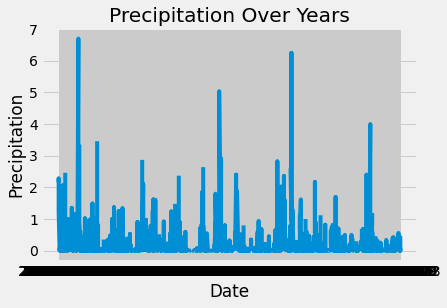

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
first_date = dt.date.fromisoformat(most_recent_date_str) - dt.timedelta(days=365) 


# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date>first_date)\
    .all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df = pd.DataFrame(date_prcp, columns = ['Date', 'Precipitation'])


# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('Date')
date_prcp_df
# Use Pandas Plotting with Matplotlib to plot the data
x_labels = date_prcp_df['Date']
y_labels = date_prcp_df['Precipitation']
plt.plot(x_labels,y_labels)
plt.title('Precipitation Over Years')
plt.xlabel('Date')
plt.ylabel('Precipitation')

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = date_prcp_df.describe()
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
stations_total = session.query(Station).count()
stations_total

9

In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#USC00519218 

best_station = active_stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

<function matplotlib.pyplot.show(close=None, block=None)>

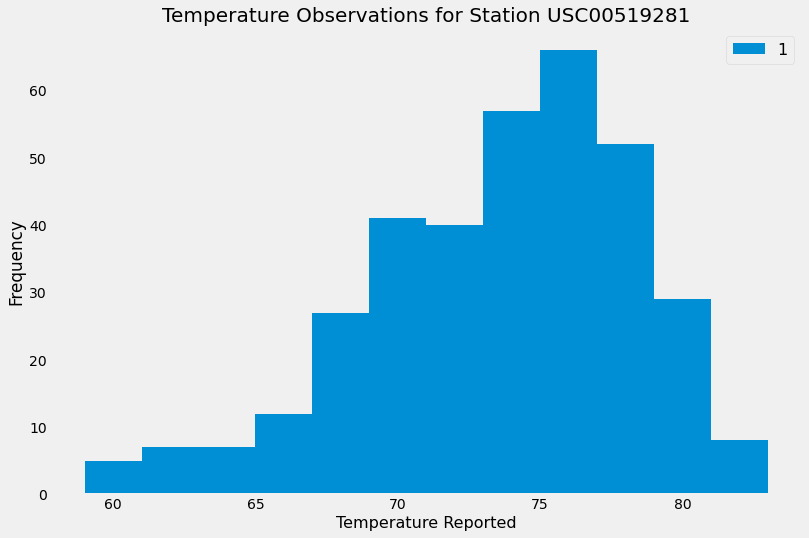

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

first_date = dt.date.fromisoformat(most_recent_date_str) - dt.timedelta(days=365) 


# Perform a query to retrieve the data and precipitation scores
best_station_info = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.station == best_station)\
    .filter(Measurement.date>first_date)\
    .all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
best_station_df = pd.DataFrame(best_station_info)
best_station_df

best_station_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

# Close Session

In [90]:
# Close Session
session.close()